# Neural Networks in Keras

## Imports

In [1]:
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Preprocessing tools
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
# Deep learning tools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import set_config
set_config(transform_output='pandas')

## Load Data

In [2]:
# import data with id column as idx
df = pd.read_csv('Data/cancer.csv', index_col=0)

In [3]:
# preview data
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# check for null values
df.isna().sum().sum()

0

In [5]:
# define X and y
target = 'diagnosis'
X = df.drop(columns = target)
y = df[target]

In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

## Conversion
NNs cannot use string labels. Convert string labels to numbers using LabelEncoder().

In [7]:
# instantiate LabelEncoder()
le = LabelEncoder()

In [8]:
# fit and transform on y train
y_train_enc = le.fit_transform(y_train)

In [9]:
# fit on y test
y_test_enc = le.transform(y_test)

In [10]:
# view transformed y train data as array
y_train_enc

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

In [11]:
# Convert encoded target values to a series
y_train_enc = pd.Series(le.transform(y_train), index=y_train.index,
             name=target)
y_test_enc = pd.Series(le.transform(y_test), index=y_test.index,
             name=target)
y_train_enc

id
8913         0
915691       1
904689       0
9110732      1
881046502    1
            ..
859711       0
863031       0
8910721      0
908489       1
862965       0
Name: diagnosis, Length: 426, dtype: int32

## Check Class Balance

In [12]:
# Check class balance
y_train_enc.value_counts(normalize = True)

0    0.629108
1    0.370892
Name: diagnosis, dtype: float64

## Scale Data

In [13]:
# instantiate scaler
scaler = StandardScaler()

In [14]:
# fit and transform
scaler.fit(X_train)
X_train_tf = scaler.transform(X_train)
X_test_tf = scaler.transform(X_test)

## Step 1: Build network structure

In [15]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train_tf.shape[1]
input_shape

30

### Model Type

In [16]:
# instantiate sequnital model type
model = Sequential()

### Hidden Layers

In [17]:
# First hidden layer
model.add(Dense(30, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

In [18]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

## Step 2: Compile Model

In [19]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam',)

In [21]:
# Reviewing the model summary before training to see all the layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


## Step 3: Fit Model

In [22]:
# Step 3: Fit our model
history = model.fit(X_train_tf, y_train_enc,
                    validation_data = (X_test_tf, y_test_enc), 
                    epochs=10)

Epoch 1/10
14/14 [==============================] - 1s 18ms/step - loss: 0.4754 - val_loss: 0.3435
Epoch 2/10
14/14 [==============================] - 0s 5ms/step - loss: 0.3183 - val_loss: 0.2343
Epoch 3/10
14/14 [==============================] - 0s 4ms/step - loss: 0.2402 - val_loss: 0.1772
Epoch 4/10
14/14 [==============================] - 0s 4ms/step - loss: 0.1949 - val_loss: 0.1442
Epoch 5/10
14/14 [==============================] - 0s 4ms/step - loss: 0.1637 - val_loss: 0.1242
Epoch 6/10
14/14 [==============================] - 0s 5ms/step - loss: 0.1412 - val_loss: 0.1102
Epoch 7/10
14/14 [==============================] - 0s 5ms/step - loss: 0.1242 - val_loss: 0.1005
Epoch 8/10
14/14 [==============================] - 0s 5ms/step - loss: 0.1113 - val_loss: 0.0932
Epoch 9/10
14/14 [==============================] - 0s 5ms/step - loss: 0.1013 - val_loss: 0.0891
Epoch 10/10
14/14 [==============================] - 0s 5ms/step - loss: 0.0930 - val_loss: 0.0854


In [23]:
# History.history is a dictionary
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [24]:
# Metric value for every training epoch
history.history['loss']

[0.4753648042678833,
 0.3183314800262451,
 0.24019519984722137,
 0.19488462805747986,
 0.16374534368515015,
 0.14116689562797546,
 0.1242276206612587,
 0.11134617030620575,
 0.10133518278598785,
 0.0929785892367363]

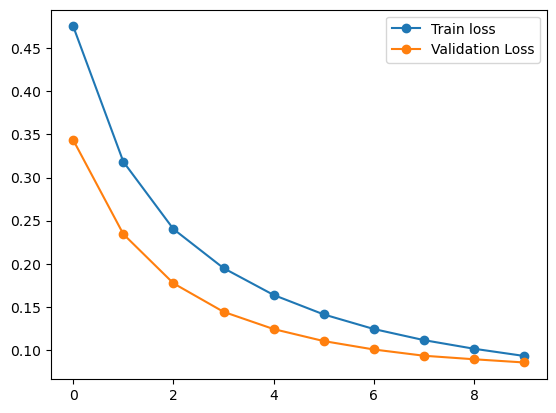

In [25]:
# Visualize the loss
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='Train loss', marker='o')
ax.plot(history.history['val_loss'], label='Validation Loss', marker='o')
ax.legend();